In [29]:
from utils import * 
from algorithms import *
from agents import *

In [30]:
numRounds, numPeriods, numSteps = 1, 10000, 10
numBuyers, numSellers, numTokens = 4, 4, 4
gameTypes, seed = '1111', 42
disclosure = []
depth = 0
gameData = [gameTypes, numBuyers, numSellers, numTokens, numRounds, numPeriods, numSteps, seed]
verbose = 0
numStates = 2
numActions = 20
epsilon = 0.99
min_epsilon = 0.05
epsilon_decay = 0.99995
alpha = 0.1
gamma = 0.99
buyers = [Reinforcer(gameData, disclosure, index=0, buyer=1, reinforcer=1, algo = 'SARSA',
                     algoArgs = [numStates, numActions, epsilon, min_epsilon, epsilon_decay, alpha, gamma]),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0),
          ZeroIntelligence(gameData, disclosure, index=0, buyer=1, reinforcer=0)]
sellers = [ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0),
           ZeroIntelligence(gameData, disclosure, index=0, buyer=0, reinforcer=0)]
log = Log(gameData, disclosure)
rnd = 0

In [31]:
for rnd in range(numRounds):
    startRounds(gameData, log, buyers, sellers, rnd)
    #print(log.roundData.buyerValues.item())
    score = 0.0
    for period in range(numPeriods):
        startPeriods(buyers, sellers)
        for step in range(numSteps):
            # start
            startSteps(buyers, sellers)

            # set state
            buyers[0].state = [step, buyers[0].periodTrades]

            # trade
            bids, asks = collectOffers(buyers, sellers)
            currentAsk, currentAskIdx, currentBid, currentBidIdx = bestOffers(bids, asks)
            price, buy, sell = trade(buyers, sellers, currentAsk, currentAskIdx, currentBid, currentBidIdx)
            bprofit, sprofit = 0, 0
            if price > 0:
                buyers[currentBidIdx].transact(price)
                sellers[currentAskIdx].transact(price)
                bprofit = buyers[currentBidIdx].stepProfits
                sprofit = sellers[currentAskIdx].stepProfits
            if currentBidIdx == 0:
                score += bprofit
                
            # log and end step
            log.addStep([rnd, period, step, bids, asks, currentBid, currentBidIdx, currentAsk, currentAskIdx, buy, sell, price, price>0, bprofit, sprofit])
            observe(buyers, sellers, log.disclose())
            endSteps(buyers, sellers) # updates period counters

            # new state and done
            buyers[0].newState = [step+1, buyers[0].periodTrades]
            if buyers[0].periodSteps == numSteps - 1:
                buyers[0].done = True
            else:
                buyers[0].done = False

            agentsObserve(buyers, sellers)
            agentsTrain(buyers, sellers)

        endPeriods(buyers, sellers)
        if period%300==0:
            print(score/300, buyers[0].algo.epsilon)
            score = 0.0
    endRounds(buyers, sellers)

0.22597779840021726 0.9895545890896058
52.524980168767655 0.8517143338962497
54.19780761292559 0.7330745716936349
58.32820098087103 0.6309607649849253
60.51612346245397 0.5430709266461107
65.91154784831126 0.46742372542817245
66.7988597696899 0.4023138201164036
66.9615922478833 0.3462734154292026
68.18237863538653 0.298039172997615
68.07313069137227 0.2565237314883162
69.89944084865613 0.2207911938381872
68.77815419120111 0.19003602900074157
67.27399179574259 0.16356491257906522
67.19556125437191 0.1407810969723689
67.3147037414259 0.12117095868689584
69.0921682474317 0.10429241954254044
68.56697901228821 0.08976498075040497
68.66181692172587 0.07726114519602066
67.5752491820636 0.06649903455779066
67.46409141059885 0.057236034825769194
68.99624145227492 0.0499978647437282
68.77140665253049 0.0499978647437282
68.24254160413925 0.0499978647437282
68.45006019708924 0.0499978647437282
68.53031042100348 0.0499978647437282
68.39845207547759 0.0499978647437282
67.93398362839662 0.04999786474

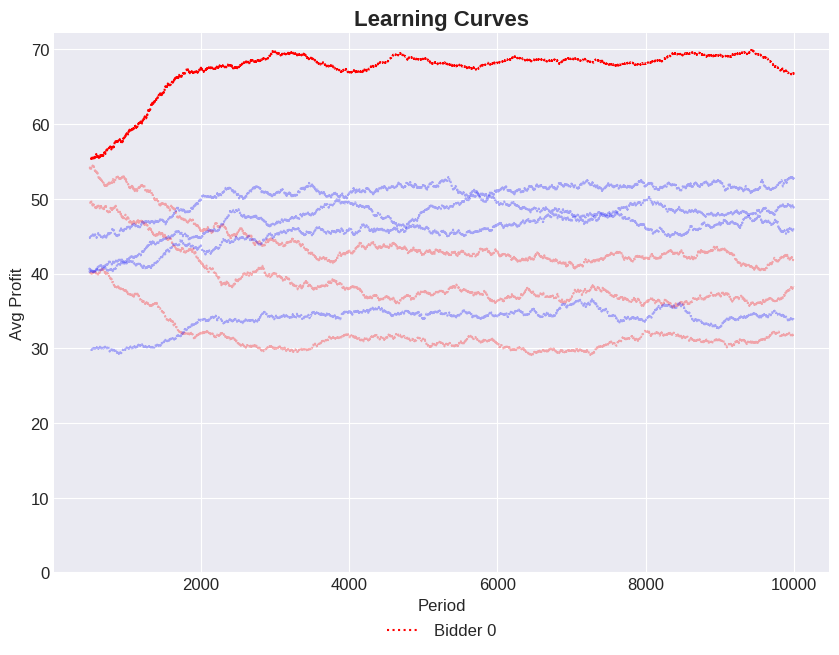

In [32]:
log.graphLearning(rolling_window = 500, trackBuyersIdx=[0], trackSellersIdx=[])

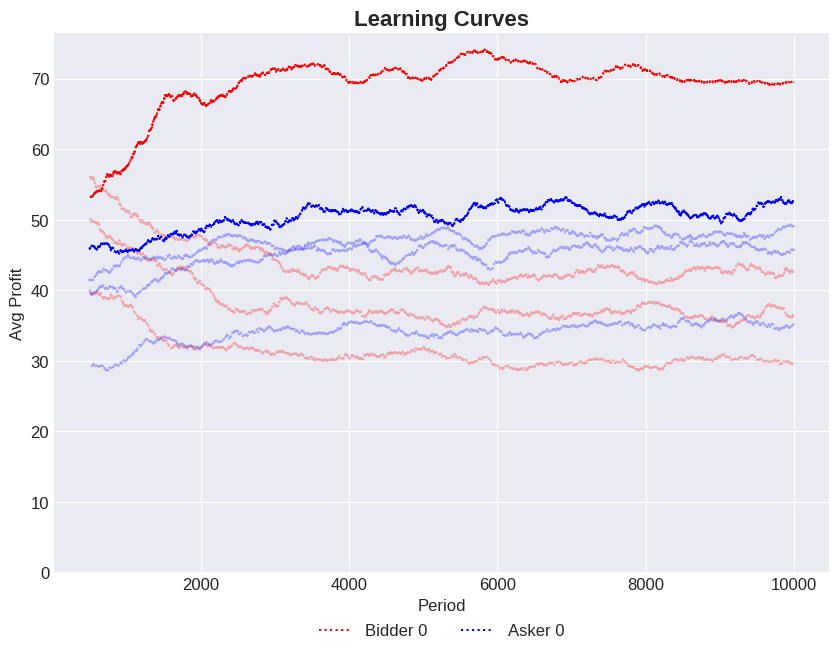

In [28]:
log.graphLearning(rolling_window = 500, trackBuyersIdx=[0], trackSellersIdx=[0])

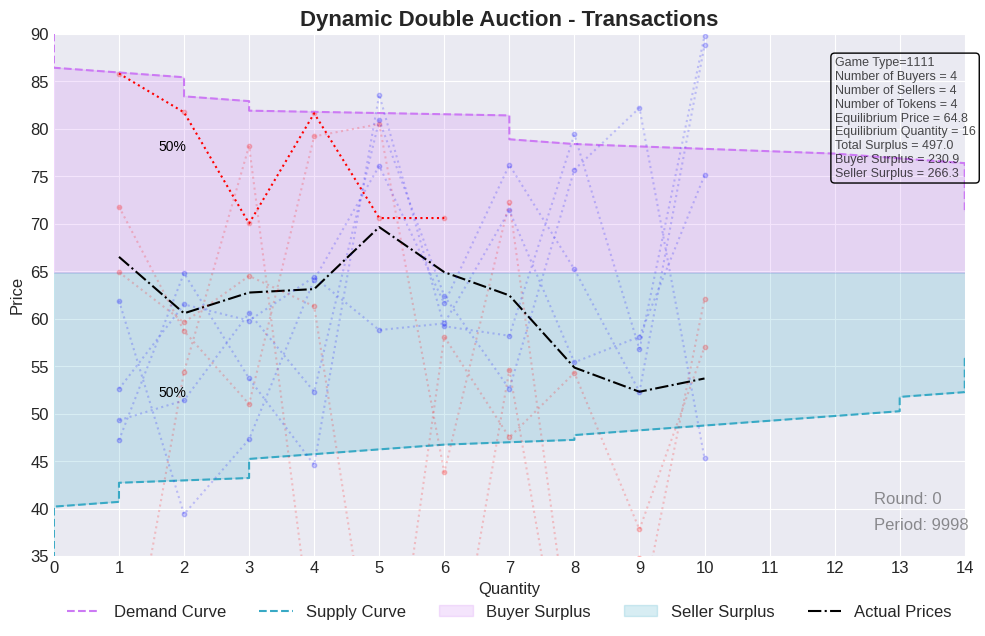

In [24]:
log.graphSales(0, period-1, trackBuyersIdx=[0], trackSellersIdx=[])

In [25]:
log.stepData.tail(15)

,rnd,period,step,bids,asks,currentBid,currentBidIdx,currentAsk,currentAskIdx,buy,sell,price,sale,bprofit,sprofit
99985,0,9998,5,"[70.59968810715438, 43.8, 58.1, 15.1]","[62.4, 59.5, 61.6, 59.2]",70.599688,0,59.2,3,True,True,64.899844,True,13.088184,15.990083
99986,0,9998,6,"[nan, 72.3, 47.5, 54.6]","[52.6, 71.4, 76.2, 58.2]",72.300000,1,52.6,0,True,True,62.450000,True,19.308515,19.603759
99987,0,9998,7,"[nan, 22.2, 54.3, 15.3]","[75.7, 55.4, 65.2, 79.4]",54.300000,2,55.4,1,True,True,54.850000,True,23.903001,7.767183
99988,0,9998,8,"[nan, 28.0, 37.8, 34.8]","[82.2, 58.1, 52.3, 56.8]",37.800000,2,52.3,2,True,False,52.300000,True,25.629169,2.902205
99989,0,9998,9,"[nan, 62.1, 57.0, 8.5]","[45.3, 75.1, 88.8, 89.8]",62.100000,1,45.3,0,True,True,53.700000,True,24.090145,8.146905
99990,0,9999,0,"[85.82202637134549, 91.0, 32.3, 62.5]","[50.6, 71.5, 55.6, 72.9]",91.000000,1,50.6,0,True,True,70.800000,True,15.202861,27.953759
99991,0,9999,1,"[85.82202637134549, 31.6, 11.0, 54.4]","[75.4, 72.6, 57.8, 43.9]",85.822026,0,43.9,3,True,True,64.861013,True,20.961013,17.788333
99992,0,9999,2,"[81.73001812994622, 20.2, 38.4, 10.9]","[75.2, 67.4, 77.3, 46.5]",81.730018,0,46.5,3,True,True,64.115009,True,17.615009,16.182875
99993,0,9999,3,"[81.63077519300987, 53.2, 60.1, 75.8]","[60.8, 69.4, 67.3, 49.8]",81.630775,0,49.8,3,True,True,65.715388,True,15.915388,16.805627
99994,0,9999,4,"[70.59968810715438, 32.9, 57.4, 64.4]","[55.8, 53.7, 70.7, 78.5]",70.599688,0,53.7,1,True,True,62.149844,True,15.838184,21.534359


In [26]:
log.getPeriod(0, period-1).sum()

rnd                                                              0
period                                                       99980
step                                                            45
bids             [85.82202637134549, 71.8, 16.1, 64.9, 81.73001...
asks             [49.3, 52.6, 61.9, 47.2, 51.4, 61.5, 39.4, 64....
currentBid                                              704.982508
currentBidIdx                                                    9
currentAsk                                                   502.1
currentAskIdx                                                   17
buy                                                             10
sell                                                             9
price                                                   610.791254
sale                                                            10
bprofit                                                 201.859358
sprofit                                                 151.89

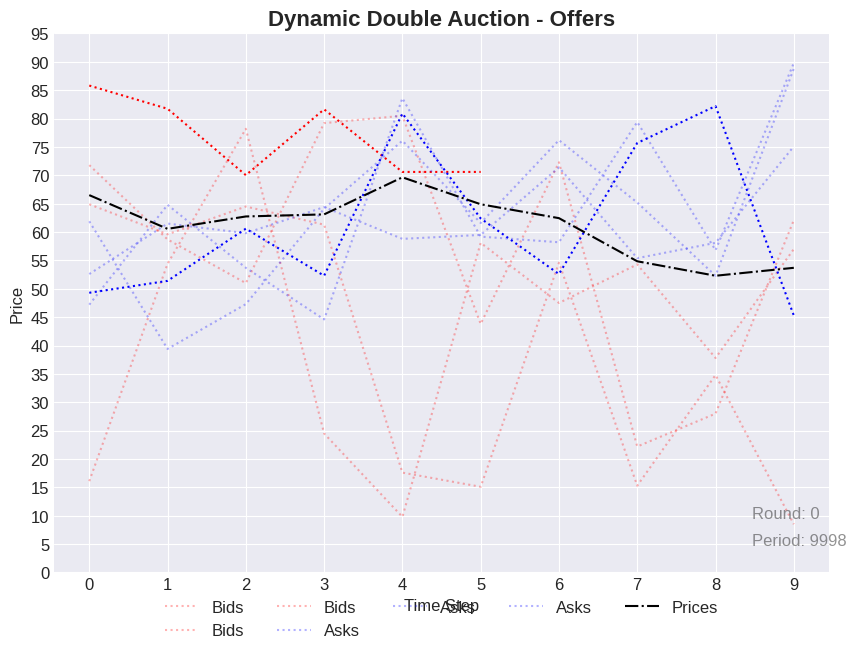

In [27]:
log.graphOffers(0, period-1, trackBuyersIdx=[0], trackSellersIdx=[0])

In [35]:
log.graphTraining(maxNumPeriods=period-1, skip = int((period-1)/100), trackBuyersIdx = [0])

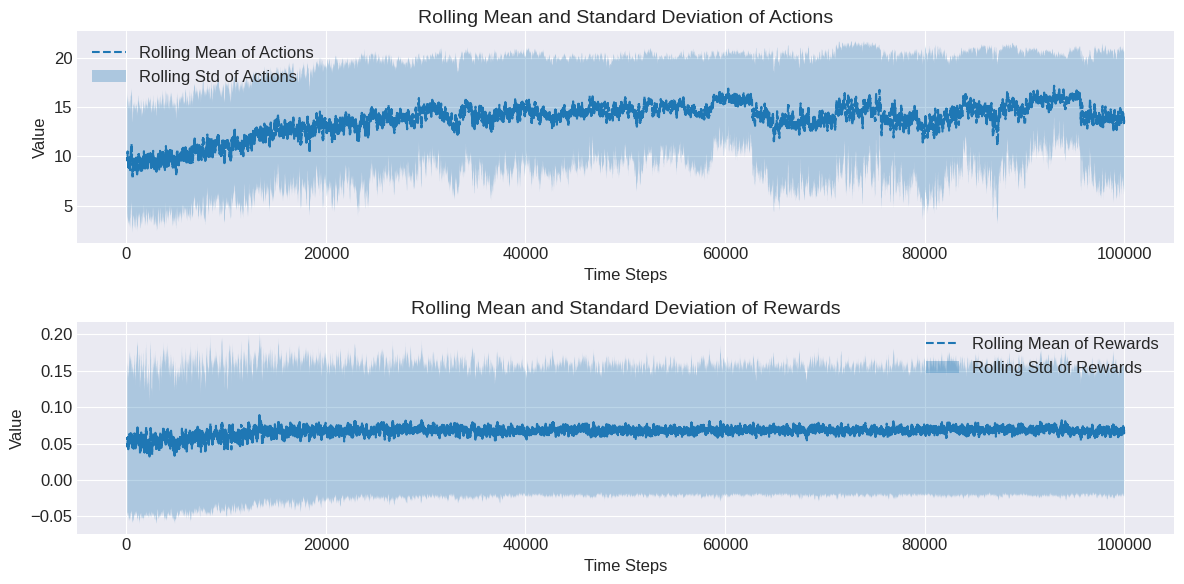

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'memory' contains your data
memory = pd.DataFrame(buyers[0].algo.memory, columns=['state', 'action', 'reward', 'newState', 'done'])

# Calculate the rolling mean and standard deviation for actions and rewards
window_size = 100  # You can adjust the window size as needed
rolling_action_mean = memory['action'].rolling(window=window_size).mean()
rolling_reward_mean = memory['reward'].rolling(window=window_size).mean()
rolling_action_std = memory['action'].rolling(window=window_size).std()
rolling_reward_std = memory['reward'].rolling(window=window_size).std()

# Plot the rolling means and standard deviations separately for actions and rewards
plt.figure(figsize=(12, 6))

# Plot Rolling Mean and Std for Actions
plt.subplot(2, 1, 1)
plt.plot(rolling_action_mean, label='Rolling Mean of Actions')
plt.fill_between(
    range(len(memory)),
    rolling_action_mean - rolling_action_std,
    rolling_action_mean + rolling_action_std,
    alpha=0.3,
    label='Rolling Std of Actions'
)
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of Actions')

# Plot Rolling Mean and Std for Rewards
plt.subplot(2, 1, 2)
plt.plot(rolling_reward_mean, label='Rolling Mean of Rewards')
plt.fill_between(
    range(len(memory)),
    rolling_reward_mean - rolling_reward_std,
    rolling_reward_mean + rolling_reward_std,
    alpha=0.3,
    label='Rolling Std of Rewards'
)
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.title('Rolling Mean and Standard Deviation of Rewards')

plt.tight_layout()
plt.show()
